<a href="https://colab.research.google.com/github/Kowsalyasriganesh/zeotap/blob/main/Kowsalya_SriGanesh_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [16]:
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

Davies-Bouldin Index: 0.7102764046737506


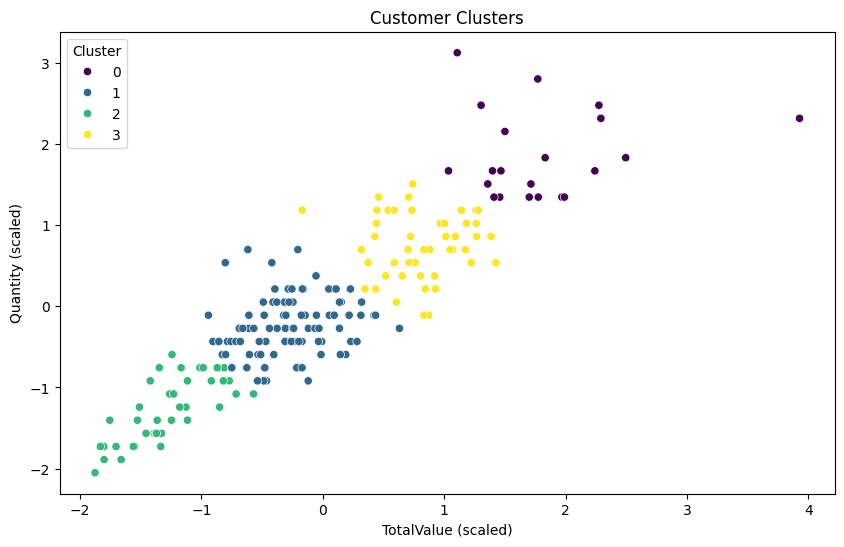

In [18]:
def perform_clustering():
    # Merge customer and transaction data
    customer_transactions = transactions_df.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
    customer_profiles = customers_df.merge(customer_transactions, on='CustomerID', how='left').fillna(0)

    # Standardize numeric features
    scaler = StandardScaler()
    features = scaler.fit_transform(customer_profiles[['TotalValue', 'Quantity']])

    # Perform clustering
    kmeans = KMeans(n_clusters=4, random_state=42)
    customer_profiles['Cluster'] = kmeans.fit_predict(features)

    # Calculate DB Index
    db_index = davies_bouldin_score(features, customer_profiles['Cluster'])
    print(f"Davies-Bouldin Index: {db_index}")

    # Visualize clusters
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=features[:, 0], y=features[:, 1], hue=customer_profiles['Cluster'], palette='viridis'
    )
    plt.title('Customer Clusters')
    plt.xlabel('TotalValue (scaled)')
    plt.ylabel('Quantity (scaled)')
    plt.legend(title='Cluster')
    plt.show()

# Execute task
perform_clustering()
